In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

/Users/abhishekkumarsarkar/anaconda3/lib/python3.6/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
pg_data = wb.DataReader('PG', data_source='yahoo', start='1995-1-1')

##### Importing "The Procter & Gamble Company (PG)" data from yahoo finance historical data<br><br> "https://in.finance.yahoo.com/quote/PG/history?p=PG"

In [3]:
pg_data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1995-01-03,15.62500,15.43750,15.46875,15.59375,3318400.0,6.362394
1995-01-04,15.65625,15.31250,15.53125,15.46875,2218800.0,6.311395
1995-01-05,15.43750,15.21875,15.37500,15.25000,2319600.0,6.222139
1995-01-06,15.40625,15.15625,15.15625,15.28125,3438000.0,6.234891
1995-01-09,15.40625,15.18750,15.34375,15.21875,1795200.0,6.209391


In [4]:
pg_data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-02-11,126.269997,124.029999,126.269997,124.160004,6105700.0,124.160004
2020-02-12,123.970001,122.849998,123.680000,123.449997,6031700.0,123.449997
2020-02-13,125.279999,123.519997,123.730003,124.959999,7159000.0,124.959999
2020-02-14,126.150002,124.790001,125.290001,126.139999,5889100.0,126.139999
2020-02-18,126.180000,124.830002,125.830002,124.870003,6767600.0,124.870003


### Simple Rate of Return <br>  <br>

#### (P1 - P0)/P0 = P1/P0 - 1
<br><br>

We will consider the Adj Close for all the calculation


In [5]:
pg_data['simple_return']= (pg_data['Adj Close']/pg_data['Adj Close'].shift(1))-1
print (pg_data['simple_return'])

Date
1995-01-03         NaN
1995-01-04   -0.008016
1995-01-05   -0.014142
1995-01-06    0.002049
1995-01-09   -0.004090
                ...   
2020-02-11   -0.015931
2020-02-12   -0.005718
2020-02-13    0.012232
2020-02-14    0.009443
2020-02-18   -0.010068
Name: simple_return, Length: 6326, dtype: float64


##### shift(1) is previous days stock price

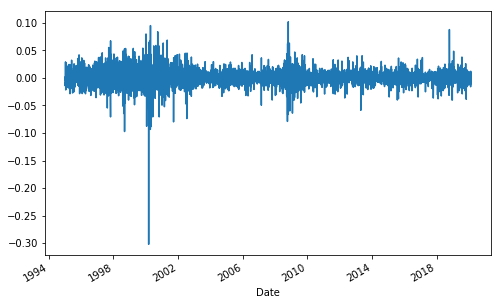

In [6]:
pg_data['simple_return'].plot(figsize=(8,5))
plt.show()

In [7]:
avg_return_d = pg_data['simple_return'].mean() # average daily rate of return
avg_return_d

0.0005687508067680574

The above output is much lower than 1%. Which is not meaningful.  <br>
The above data is not of 365 days of observations data because there can be bank holidays, saturday, sundays e.t.c <br>
No of trading days in a year is near about 250 to 255<br>

In [8]:
avg_return_a = pg_data['simple_return'].mean() * 250 # average annual rate of return
avg_return_a

0.14218770169201436

In [9]:
print(str(round(avg_return_a, 5)*100)+'%')

14.219000000000001%


### "The Procter & Gamble Company (PG)" stock simple rate of return is  14.261%

### Log Rate of Return <br>  <br>


As we are using the single stock for calculation so we will use Logarthmic Rate of return


In [10]:
pg_data.head()

,High,Low,Open,Close,Volume,Adj Close,simple_return
Date,,,,,,,
1995-01-03,15.62500,15.43750,15.46875,15.59375,3318400.0,6.362394,NaN
1995-01-04,15.65625,15.31250,15.53125,15.46875,2218800.0,6.311395,-0.008016
1995-01-05,15.43750,15.21875,15.37500,15.25000,2319600.0,6.222139,-0.014142
1995-01-06,15.40625,15.15625,15.15625,15.28125,3438000.0,6.234891,0.002049
1995-01-09,15.40625,15.18750,15.34375,15.21875,1795200.0,6.209391,-0.004090


In [11]:
pg_data['log_return'] = np.log(pg_data['Adj Close']/pg_data['Adj Close'].shift(1))
print(pg_data['log_return'])

Date
1995-01-03         NaN
1995-01-04   -0.008048
1995-01-05   -0.014243
1995-01-06    0.002047
1995-01-09   -0.004098
                ...   
2020-02-11   -0.016059
2020-02-12   -0.005735
2020-02-13    0.012157
2020-02-14    0.009399
2020-02-18   -0.010119
Name: log_return, Length: 6326, dtype: float64


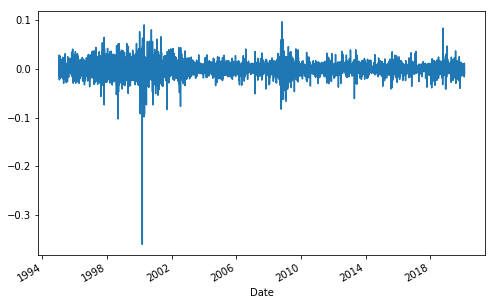

In [12]:
pg_data['log_return'].plot(figsize=(8,5))
plt.show()

In [13]:
log_return_d = pg_data['log_return'].mean()
log_return_d

0.0004706511374200437

In [14]:
log_return_a = pg_data['log_return'].mean()*250
log_return_a

0.11766278435501093

In [15]:
print(str(round(log_return_a, 5)*100)+'%')

11.766%


### "The Procter & Gamble Company (PG)" stock Algo rate of return is  11.808%
